In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("full_db.csv")

In [3]:
df

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
0,2018-08-26,Barbados,Cuba,160.0,181.0,0.0,0.0,2,-21.0,0.0,...,1.000000,1.0,0.018519,0.018519,0.000000,0.0,0.000000,0.000000,0,1
1,2018-08-29,Barbados,Cuba,160.0,181.0,0.0,2.0,1,-21.0,0.0,...,1.000000,1.0,0.012022,0.012022,0.500000,0.5,0.003125,0.003125,0,1
2,2018-09-06,Mongolia,Guam,186.0,190.0,1.0,1.0,2,-4.0,0.0,...,3.000000,3.0,0.016216,0.016216,0.000000,0.0,0.000000,0.000000,1,0
3,2018-09-06,Nepal,Bhutan,161.0,183.0,4.0,0.0,0,-22.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1,0
4,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1.0,0.0,0,-7.0,0.0,...,1.500000,1.5,0.008197,0.008197,3.000000,3.0,0.018634,0.018634,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2022-09-27,Albania,Iceland,66.0,63.0,1.0,1.0,2,3.0,0.0,...,1.365854,0.6,0.019776,0.007318,1.120000,1.8,0.035917,0.021851,1,0
3196,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,1.833333,2.0,0.041984,0.090235,1.866667,2.0,0.053327,0.073887,1,0
3197,2022-09-27,Sweden,Slovenia,20.0,65.0,1.0,1.0,2,-45.0,0.0,...,1.607843,0.6,0.048520,0.009231,1.404762,1.0,0.026035,0.029545,1,0
3198,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,1.326087,1.2,0.018478,0.016825,0.767442,1.0,0.009687,0.019652,1,0


Ideia: tirar empate para tranformar em classificação binária e considerá-lo como uma vitória do time 2/visitante

Necessidade: calcular qual margem ideal na probabilidade para saber se um resultado atribuído como vitória de um dos times é na verdade empate

In [4]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

In [5]:
df_model = df.drop(["result"], axis=1)

Análises:

- Objetivo: visualizar graficamente o impacto das features
- Ideias:
    * violin plots para analisar distribuições
    * boxplot para verificar similaridades entre features e como elas estão separando os dados
    * jointplot para features em específico
    * Histograma para analisar se as features separam bem os dados

In [6]:
df.columns[8:15]

Index(['rank_dif', 'rank_change_home', 'rank_change_away', 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5'],
      dtype='object')

In [7]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]

In [8]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

In [9]:
scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

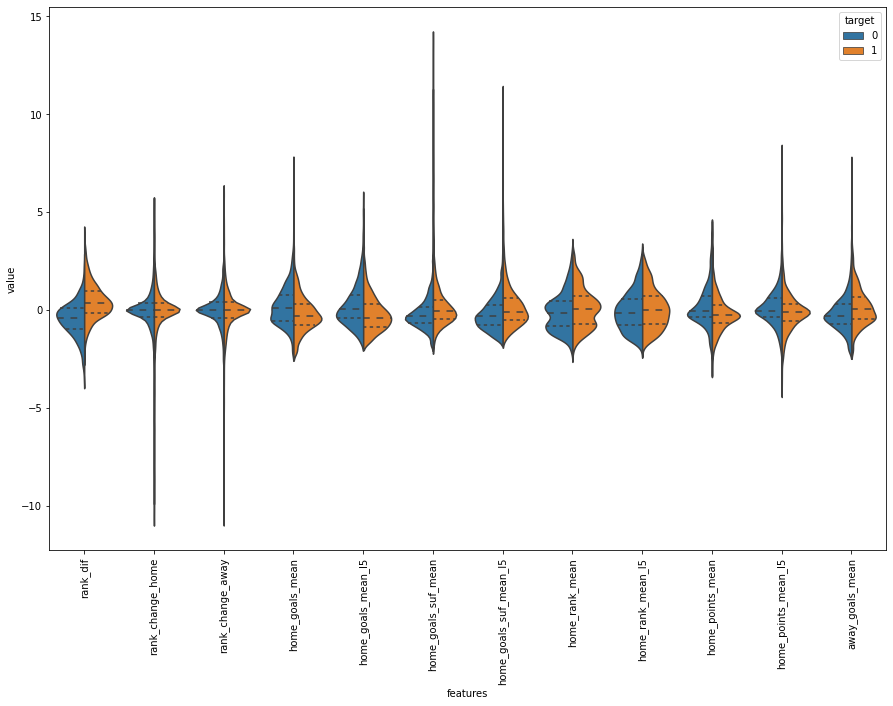

In [10]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

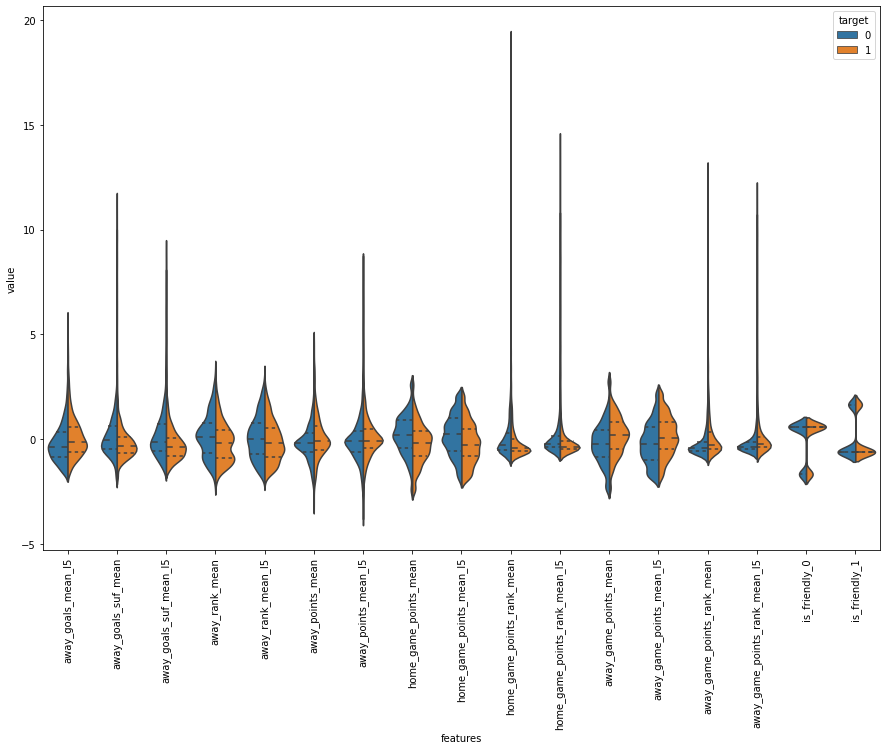

In [11]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Testes:

- Diferença de gols marcados entre as equipes
- Diferença de gols sofridos entre as equipes
- Diferença entre gols marcados em média e gols sofridos em média pelas equipes
- Diferença entre crescimento de pontos

In [12]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

In [13]:
data_difs = dif.iloc[:, -8:]

In [14]:

scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'goals_dif'),
  Text(1, 0, 'goals_dif_l5'),
  Text(2, 0, 'goals_suf_dif'),
  Text(3, 0, 'goals_suf_dif_l5'),
  Text(4, 0, 'goals_made_suf_dif'),
  Text(5, 0, 'goals_made_suf_dif_l5'),
  Text(6, 0, 'goals_suf_made_dif'),
  Text(7, 0, 'goals_suf_made_dif_l5')])

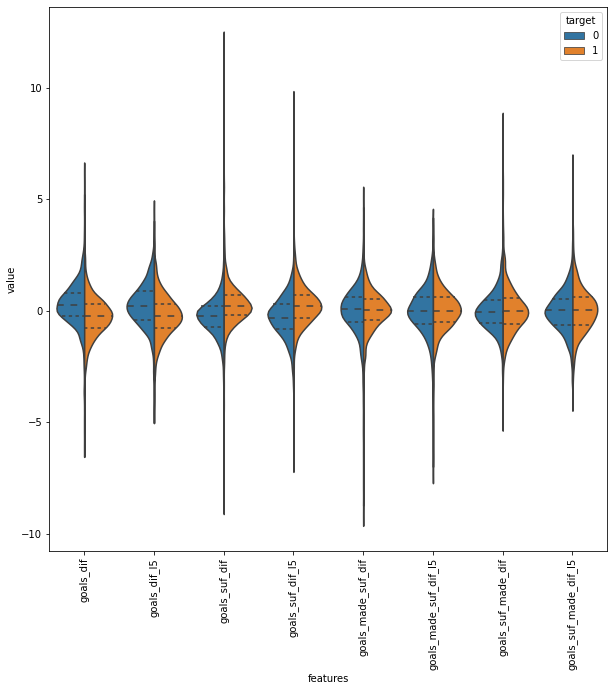

In [15]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)

Features até agora:

- rank_dif
- goals_dif
- goals_dif_l5 (pros ultimos 5 jogos)
- goals_suf_dif
- goals_suf_dif_l5

Possíveis adições: ponderar gols por ranking do jogo
- mean_rank é o ranking médio enfrentando -> possibilidade = média de gols/média de ranking

In [16]:
dif.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away',
       'home_score', 'away_score', 'result', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5', 'is_friendly_0', 'is_friendly_1',
       'target', 'goals_dif', 'goals_dif_l5', 'goals_suf_dif',
       'goals_suf_dif_l5', 'goals_made_suf_dif', 'goals_made_suf_dif_l5',
       'goals_suf_m

In [17]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]

In [18]:
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [19]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

In [20]:
dif.iloc[:,-10:]

,dif_points,dif_points_l5,dif_points_rank,dif_points_rank_l5,dif_rank_agst,dif_rank_agst_l5,goals_per_ranking_dif,goals_per_ranking_suf_dif,goals_per_ranking_dif_l5,goals_per_ranking_suf_dif_l5
0,1.000000,1.0,0.018519,0.018519,-92.000000,-92.0,0.037037,0.030188,0.037037,0.030188
1,0.500000,0.5,0.008897,0.008897,-35.500000,-35.5,0.008511,0.005243,0.008511,0.005243
2,3.000000,3.0,0.016216,0.016216,0.000000,0.0,0.021622,-0.005405,0.021622,-0.005405
3,0.000000,0.0,0.000000,0.000000,7.000000,7.0,0.004975,-0.000359,0.004975,-0.000359
4,-1.500000,-1.5,-0.010437,-0.010437,30.500000,30.5,-0.007200,-0.003600,-0.007200,-0.003600
...,...,...,...,...,...,...,...,...,...,...
3195,0.245854,-1.2,-0.016141,-0.014533,21.632683,-14.8,-0.005083,-0.015460,-0.016394,-0.004593
3196,-0.033333,0.0,-0.011343,0.016348,9.014286,-3.4,-0.005282,-0.006512,-0.018312,-0.002601
3197,0.203081,-0.4,0.022485,-0.020314,-25.102241,10.2,0.009459,0.009092,0.010316,0.015447
3198,0.558645,0.2,0.008791,-0.002827,7.037917,1.6,0.007625,-0.008259,0.006972,-0.001806


In [21]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

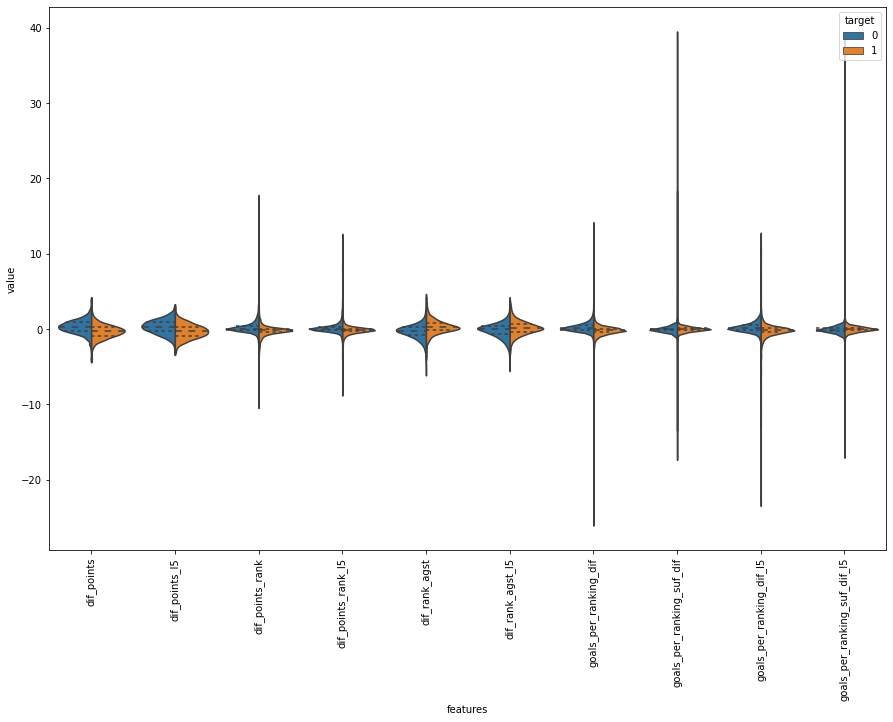

In [22]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'dif_points'),
  Text(1, 0, 'dif_points_l5'),
  Text(2, 0, 'dif_points_rank'),
  Text(3, 0, 'dif_points_rank_l5'),
  Text(4, 0, 'dif_rank_agst'),
  Text(5, 0, 'dif_rank_agst_l5'),
  Text(6, 0, 'goals_per_ranking_dif'),
  Text(7, 0, 'goals_per_ranking_suf_dif'),
  Text(8, 0, 'goals_per_ranking_dif_l5'),
  Text(9, 0, 'goals_per_ranking_suf_dif_l5')])

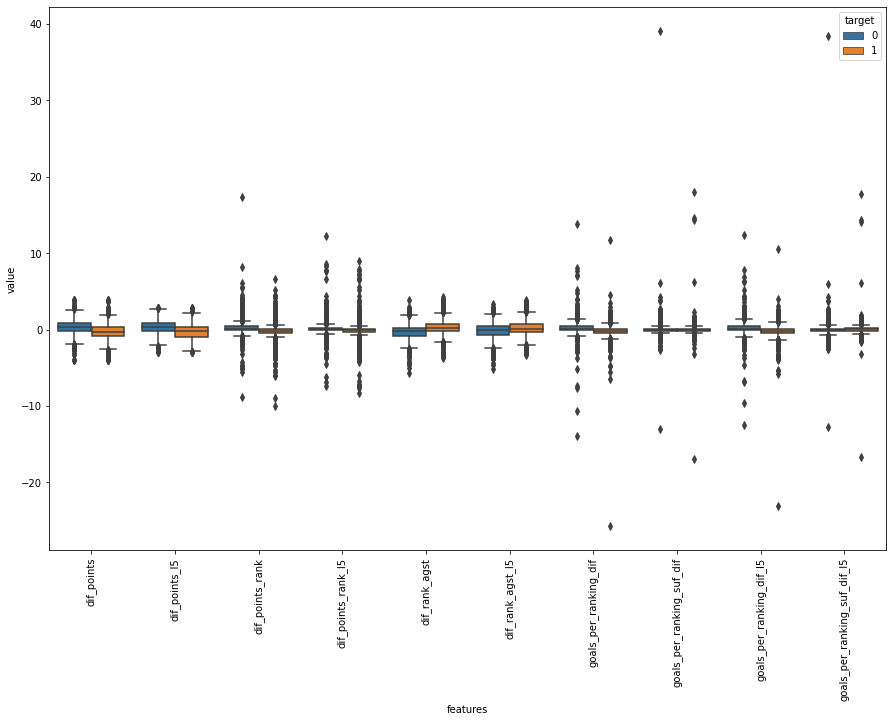

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)

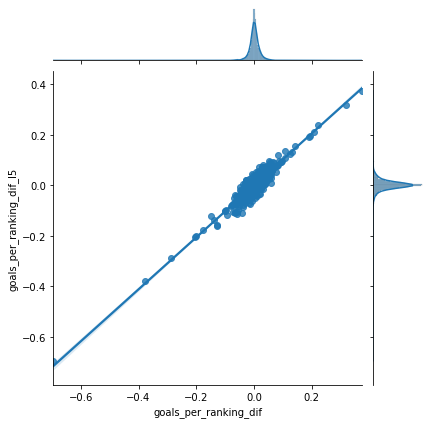

In [24]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

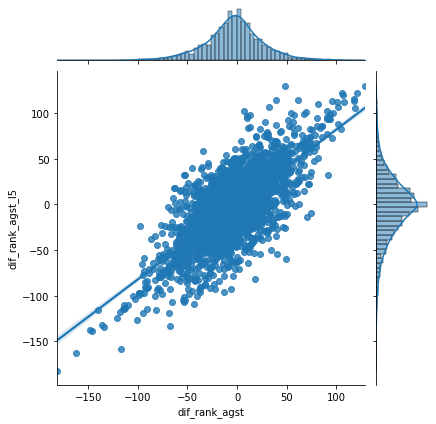

In [25]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

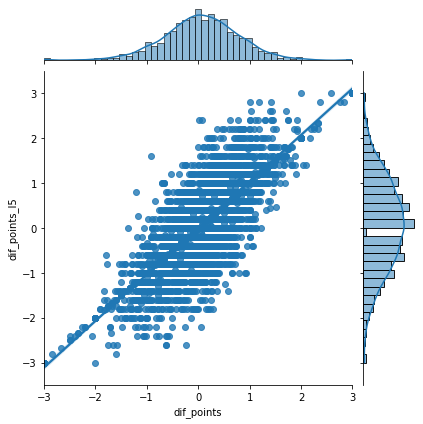

In [26]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

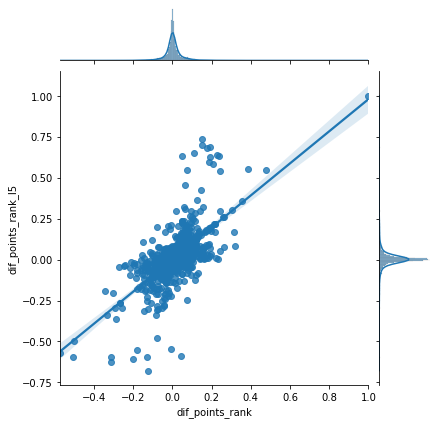

In [27]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

Utilizaremos:


- rank_dif
- goals_dif
- goals_dif_l5 (pros ultimos 5 jogos)
- goals_suf_dif
- goals_suf_dif_l5
- dif_rank_agst
- dif_rank_agst_l5
- goals_per_ranking_dif
- is_friendly

In [28]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [29]:
model_db = create_db(df)

In [30]:
model_db.to_csv("model_db.csv", index=False)